In [41]:
#impoty pandas package
import numpy as np 
import pandas as pd
from pandas import DataFrame 
import scipy.stats as stats  
import seaborn as sns 
import matplotlib.pyplot as plt 

In [43]:
#import medical_raw_data spreadsheet data into the enviorment
df = pd.read_csv("medical_clean.csv")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [47]:
# Print the unique values in the 'Initial_admin' column to verify the exact strings
print("All unique values in 'Initial_admin':", df['Initial_admin'].unique())


All unique values in 'Initial_admin': ['Emergency Admission' 'Elective Admission' 'Observation Admission']


In [49]:
# Correcting the filtering criteria according to the exact strings from the unique values output
emergency_admissions = df[df['Initial_admin'].str.strip() == 'Emergency Admission']['TotalCharge']
elective_admissions = df[df['Initial_admin'].str.strip() == 'Elective Admission']['TotalCharge']

# Print counts to check if filtering is now successful
print("Corrected Emergency admissions count:", emergency_admissions.count())
print("Corrected Elective admissions count:", elective_admissions.count())

Corrected Emergency admissions count: 5060
Corrected Elective admissions count: 2504


In [51]:
# Run the T-test if subsets are non-empty ## Reference: Hosseini, S. (2023)
if not emergency_admissions.empty and not elective_admissions.empty:
    t_stat, p_value = stats.ttest_ind(emergency_admissions, elective_admissions, equal_var=False)
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
else:
    print("One or both subsets are still empty, please check data filtering criteria.")

T-statistic: 8.432057584083545
P-value: 4.3904300778141855e-17


        TotalCharge  Initial_days
count  10000.000000  10000.000000
mean    5312.172769     34.455299
std     2180.393838     26.309341
min     1938.312067      1.001981
25%     3179.374015      7.896215
50%     5213.952000     35.836244
75%     7459.699750     61.161020
max     9180.728000     71.981490


C:\Users\zaina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zaina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


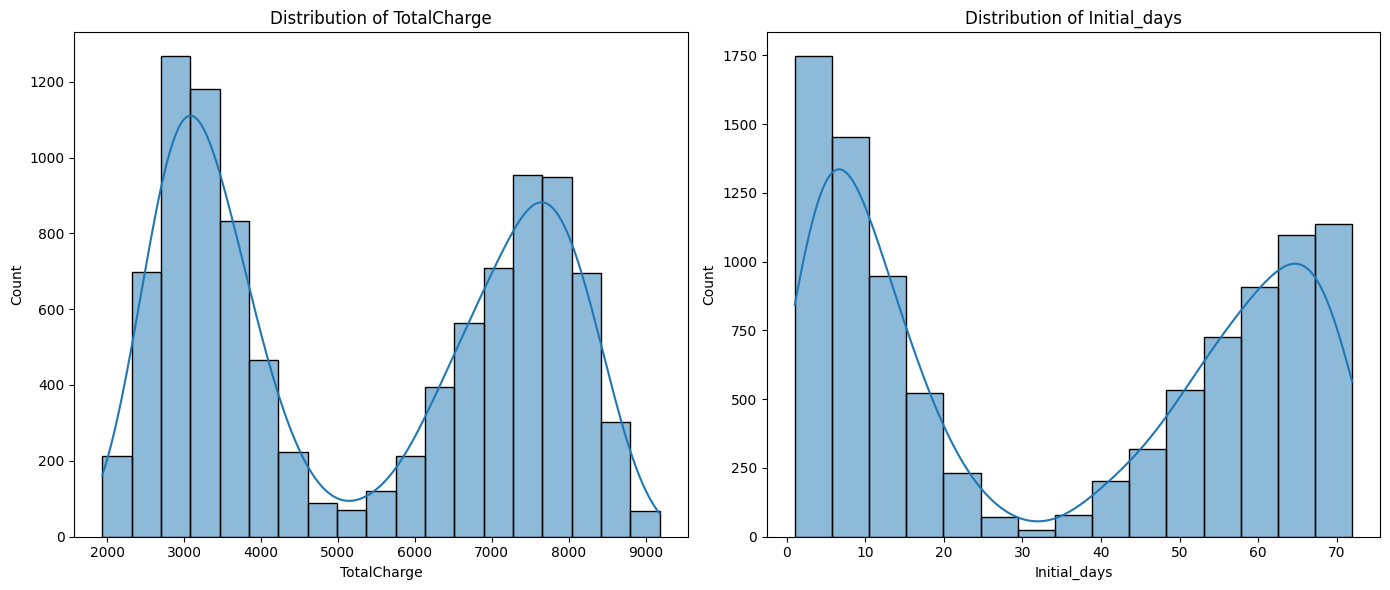

In [53]:
# Summary statistics
continuous_variables = ['TotalCharge', 'Initial_days']
summary_stats = df[continuous_variables].describe()

# Print the summary statistics
print(summary_stats)

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first graph (TotalCharge)
sns.histplot(df['TotalCharge'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of TotalCharge')
axes[0].set_xlabel('TotalCharge')

# Plot the second graph (Initial_days)
sns.histplot(df['Initial_days'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Initial_days')
axes[1].set_xlabel('Initial_days')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


Frequency counts for Initial_admin:
 Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

Frequency counts for ReAdmis:
 ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64


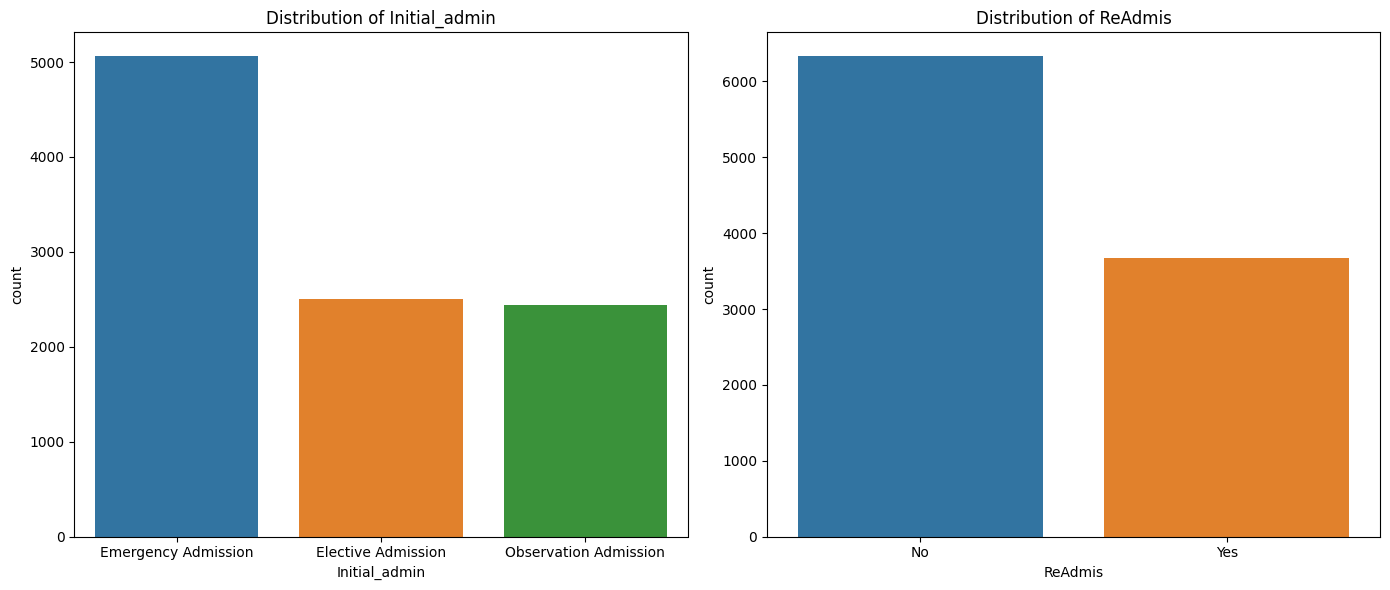

In [54]:
# Categorical Variables: Initial_admin, ReAdmis
categorical_variables = ['Initial_admin', 'ReAdmis']

# Frequency counts for categorical variables
for col in categorical_variables:
    print(f'\nFrequency counts for {col}:\n', df[col].value_counts())

# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first bar chart (Initial_admin)
sns.countplot(x=df['Initial_admin'], ax=axes[0])
axes[0].set_title('Distribution of Initial_admin')
axes[0].set_xlabel('Initial_admin')

# Plot the second bar chart (ReAdmis)
sns.countplot(x=df['ReAdmis'], ax=axes[1])
axes[1].set_title('Distribution of ReAdmis')
axes[1].set_xlabel('ReAdmis')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

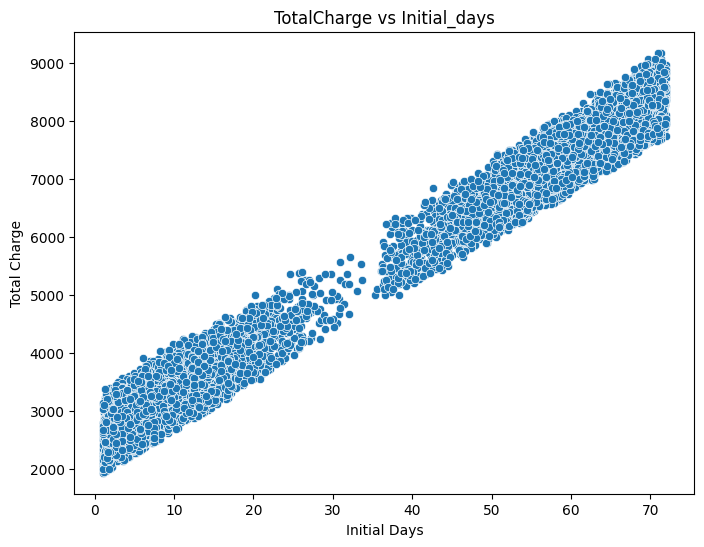

Correlation between TotalCharge and Initial_days: 0.9876402655398169


In [55]:
# Scatter plot for bivariate analysis of TotalCharge vs Initial_days
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Initial_days', y='TotalCharge', data=df)
plt.title('TotalCharge vs Initial_days')
plt.xlabel('Initial Days')
plt.ylabel('Total Charge')
plt.show()

# Calculate the correlation between the two variables
correlation = df['TotalCharge'].corr(df['Initial_days'])
print(f"Correlation between TotalCharge and Initial_days: {correlation}")


Contingency Table:
 ReAdmis                  No   Yes
Initial_admin                    
Elective Admission     1608   896
Emergency Admission    3156  1904
Observation Admission  1567   869


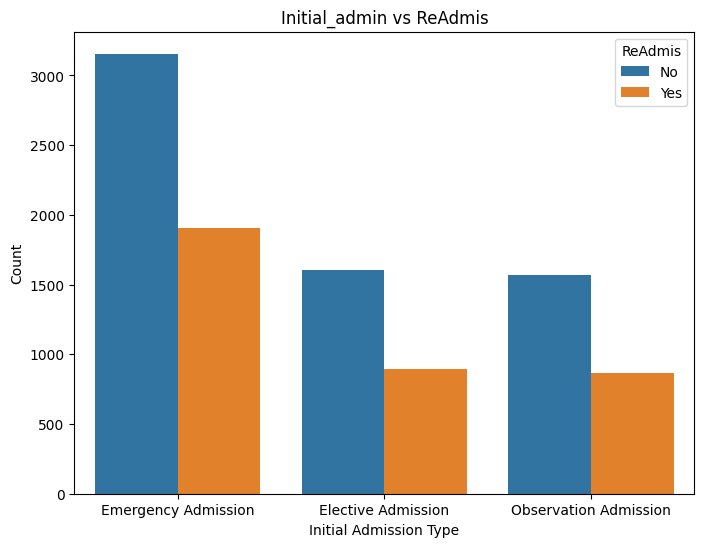

In [57]:
# Contingency table for Initial_admin and ReAdmis
contingency_table = pd.crosstab(df['Initial_admin'], df['ReAdmis'])
print("\nContingency Table:\n", contingency_table)

# Grouped bar plot for bivariate analysis of Initial_admin and ReAdmis
plt.figure(figsize=(8, 6))
sns.countplot(x='Initial_admin', hue='ReAdmis', data=df)
plt.title('Initial_admin vs ReAdmis')
plt.xlabel('Initial Admission Type')
plt.ylabel('Count')
plt.show()